In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import matplotlib.dates as mdates


# Function for the Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4]
    }

# Forecasting and evaluation function
def forecast_and_evaluate(model, steps, actual_data):
    forecast = model.get_forecast(steps=steps).predicted_mean
    mae = mean_absolute_error(actual_data, forecast)
    mse = mean_squared_error(actual_data, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_data - forecast) / actual_data)) * 100
    return forecast, mae, mse, rmse, mape


In [2]:
# Load and preprocess the data
file_path = 'Dataset/all_commodities_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', inplace=True)


C:\Users\zhizh\AppData\Local\Temp\ipykernel_10596\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


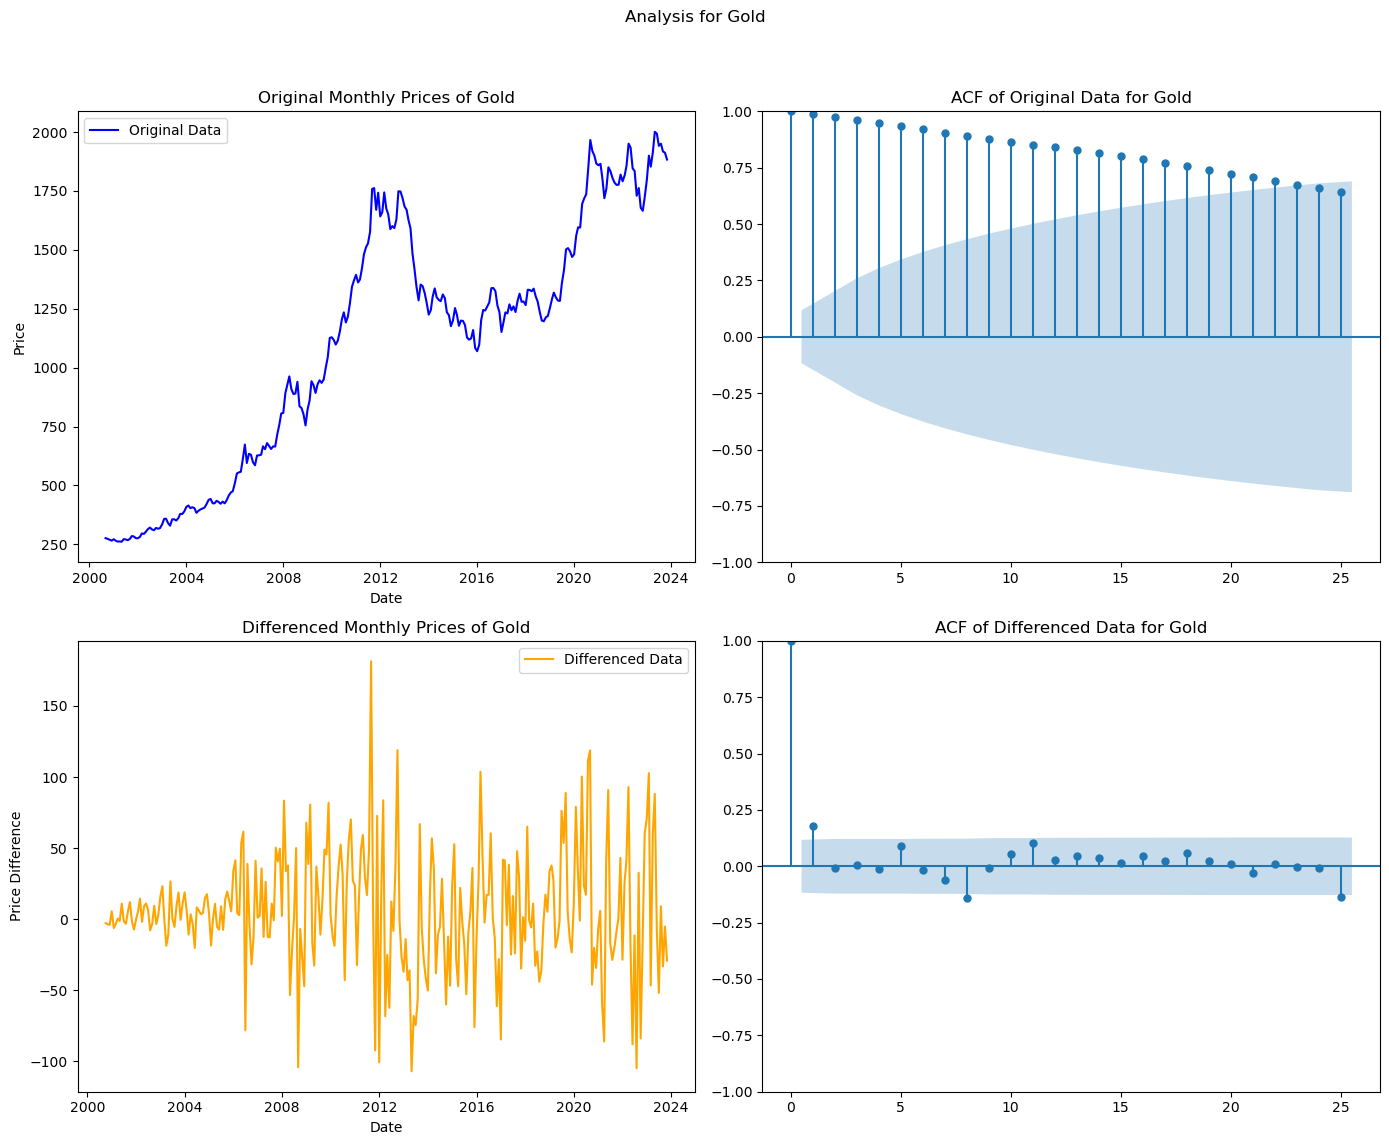

ADF Test Result for Original Data of Gold:
{'Test Statistic': -0.8927772288614194, 'p-value': 0.7903416730224763, 'Lags Used': 1, 'Number of Observations Used': 277, 'Critical Values': {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}}

ADF Test Result for Differenced Data of Gold:
{'Test Statistic': -13.811632641540697, 'p-value': 8.21074451101832e-26, 'Lags Used': 0, 'Number of Observations Used': 277, 'Critical Values': {'1%': -3.4541800885158525, '5%': -2.872031361137725, '10%': -2.5723603999791473}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_10596\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


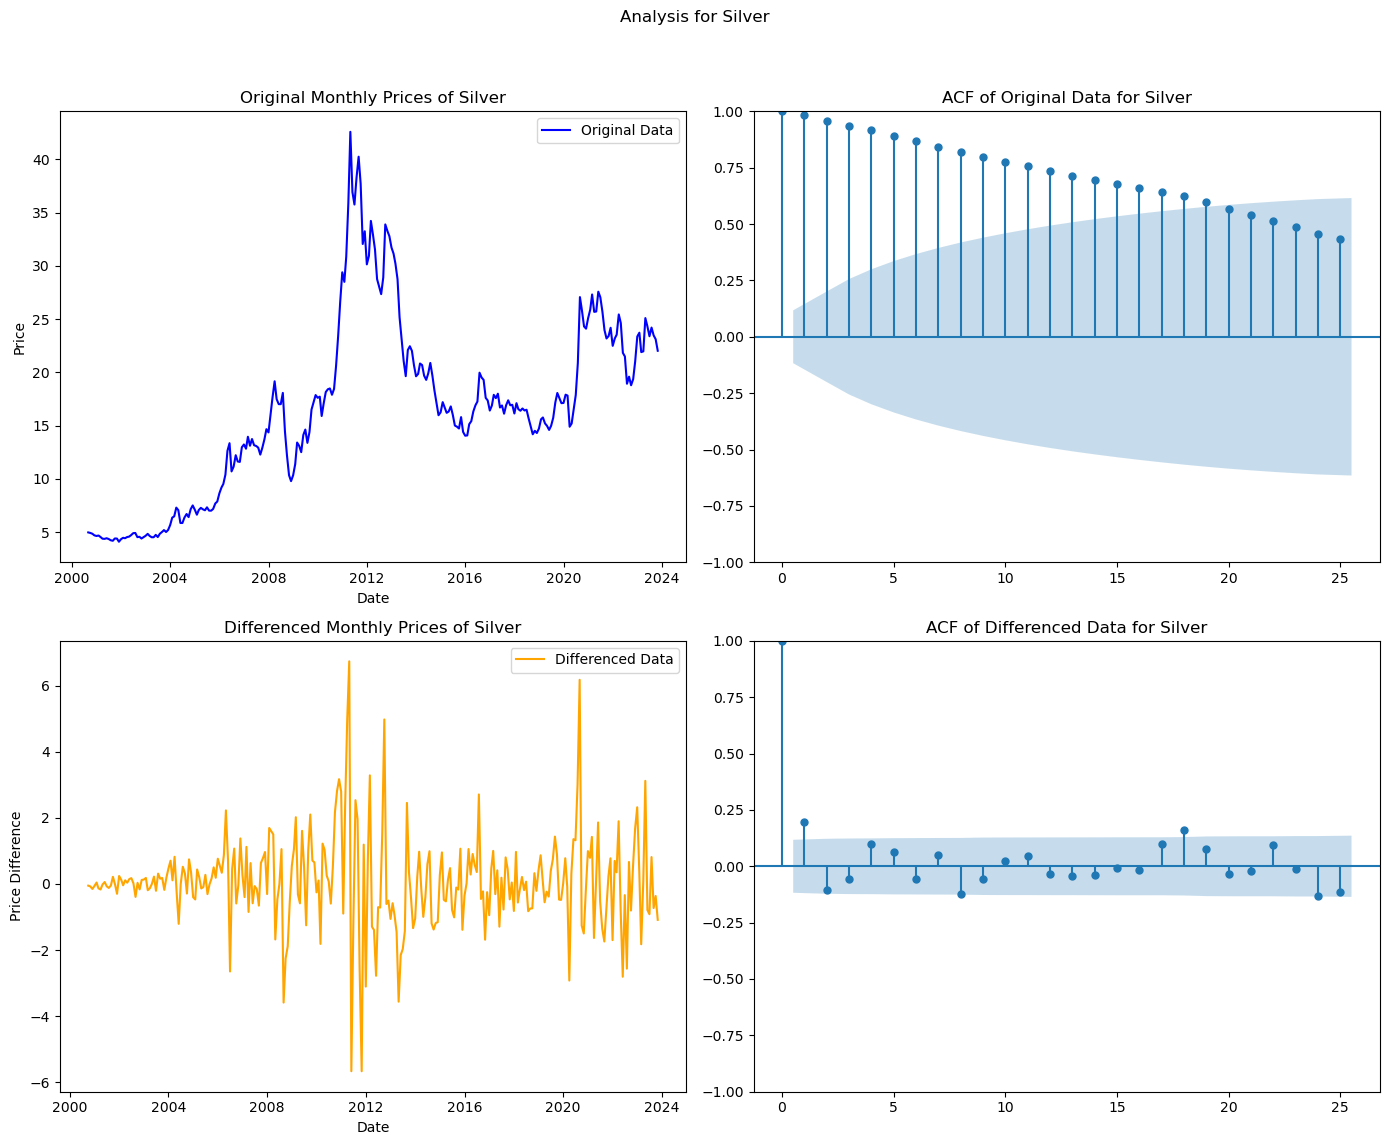

ADF Test Result for Original Data of Silver:
{'Test Statistic': -1.7861928978835453, 'p-value': 0.3873377608816597, 'Lags Used': 8, 'Number of Observations Used': 270, 'Critical Values': {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}}

ADF Test Result for Differenced Data of Silver:
{'Test Statistic': -6.298085979829614, 'p-value': 3.4659427796755646e-08, 'Lags Used': 7, 'Number of Observations Used': 270, 'Critical Values': {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_10596\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


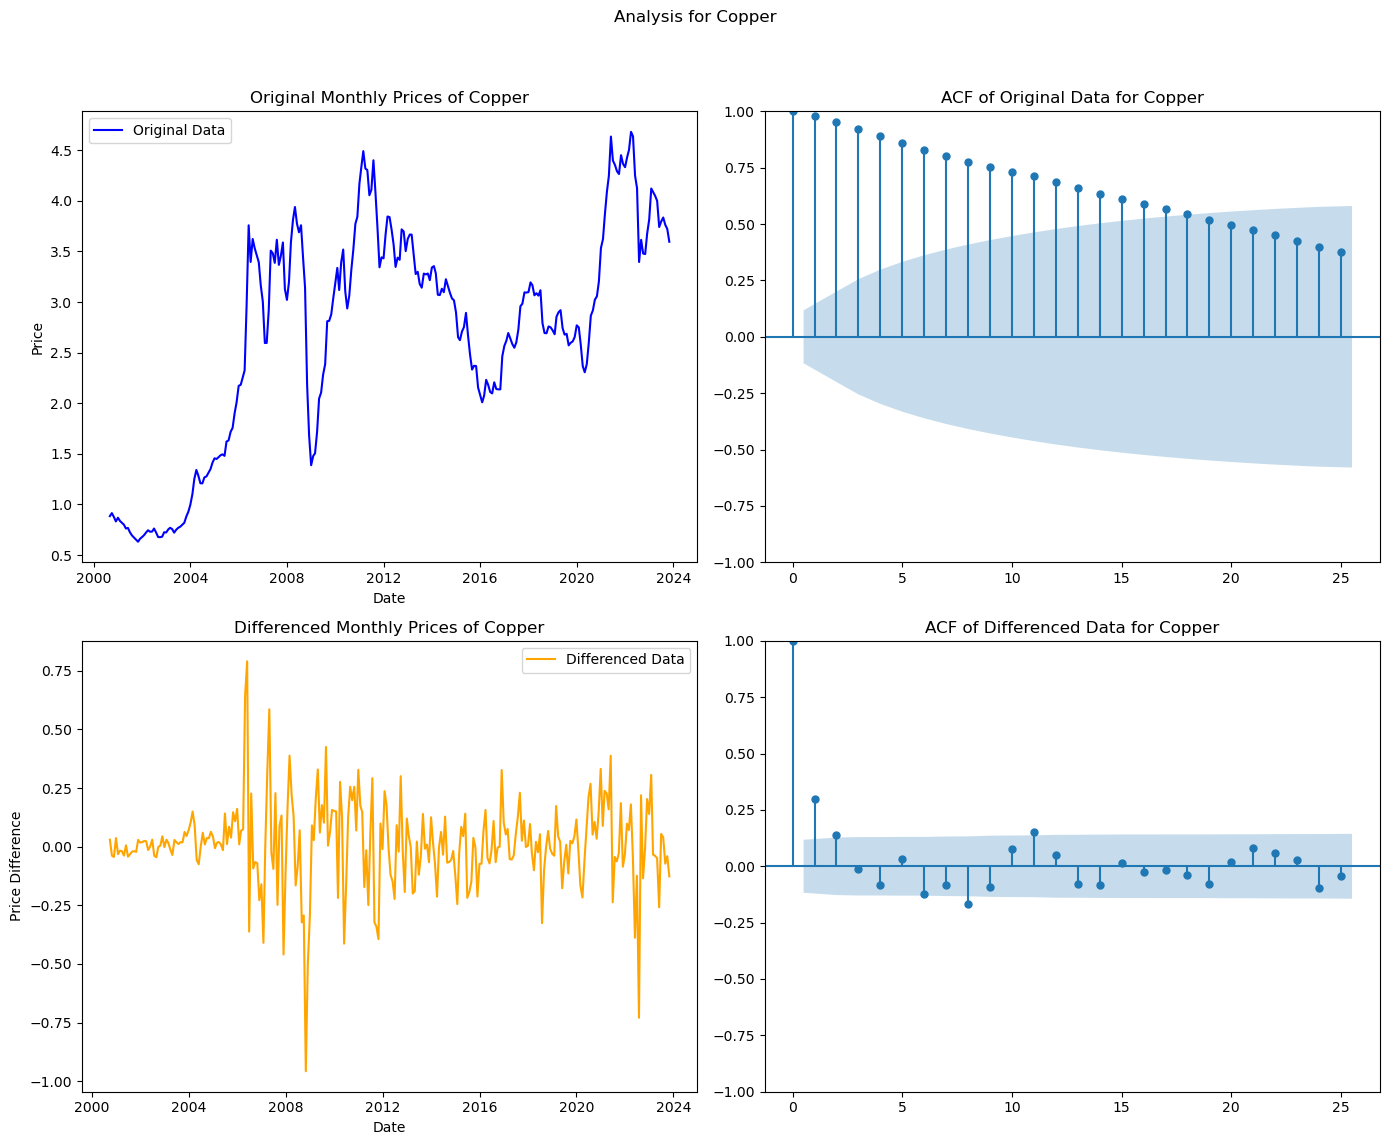

ADF Test Result for Original Data of Copper:
{'Test Statistic': -2.081209740824324, 'p-value': 0.2521370713146027, 'Lags Used': 13, 'Number of Observations Used': 265, 'Critical Values': {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}}

ADF Test Result for Differenced Data of Copper:
{'Test Statistic': -4.957687430317995, 'p-value': 2.6894959484092435e-05, 'Lags Used': 12, 'Number of Observations Used': 265, 'Critical Values': {'1%': -3.4552699038400827, '5%': -2.8725092359464526, '10%': -2.5726152830188678}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_10596\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


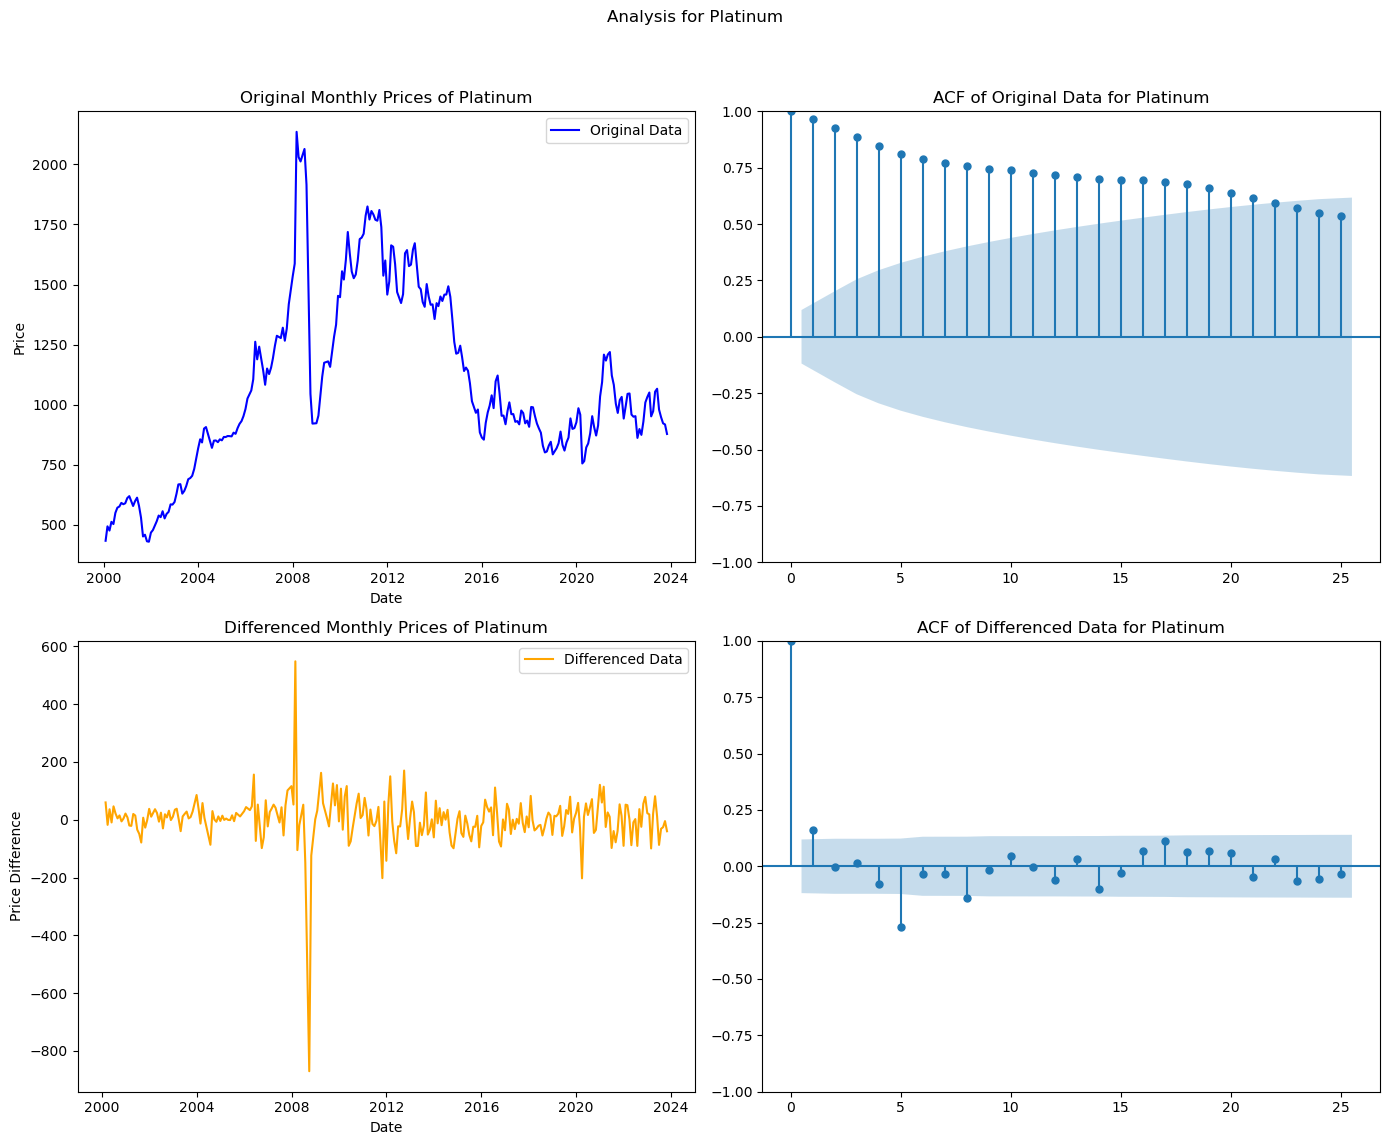

ADF Test Result for Original Data of Platinum:
{'Test Statistic': -1.9760196616552517, 'p-value': 0.2971855974021381, 'Lags Used': 5, 'Number of Observations Used': 266, 'Critical Values': {'1%': -3.455175292841607, '5%': -2.8724677563219485, '10%': -2.57259315846006}}

ADF Test Result for Differenced Data of Platinum:
{'Test Statistic': -7.657132409743088, 'p-value': 1.7270545035595682e-11, 'Lags Used': 7, 'Number of Observations Used': 263, 'Critical Values': {'1%': -3.4554613060274972, '5%': -2.8725931472675046, '10%': -2.5726600403359887}}

--------------------------------------------------



C:\Users\zhizh\AppData\Local\Temp\ipykernel_10596\2525914946.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()


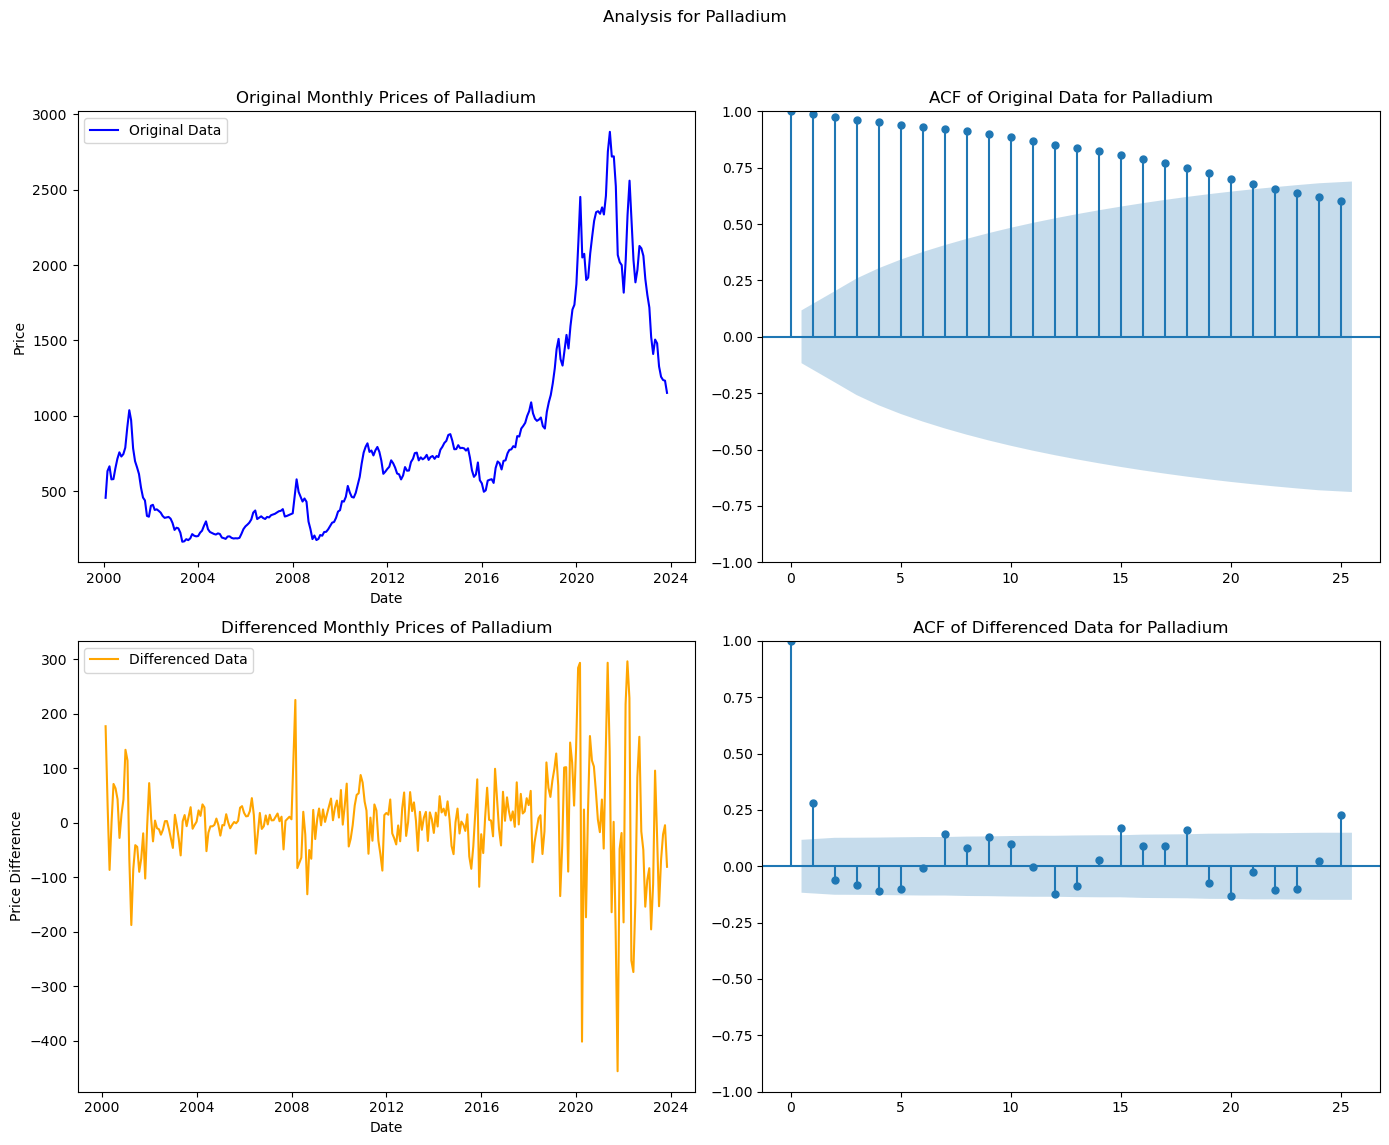

ADF Test Result for Original Data of Palladium:
{'Test Statistic': -1.847940773248458, 'p-value': 0.35693333773308367, 'Lags Used': 15, 'Number of Observations Used': 264, 'Critical Values': {'1%': -3.455365238788105, '5%': -2.8725510317187024, '10%': -2.5726375763314966}}

ADF Test Result for Differenced Data of Palladium:
{'Test Statistic': -4.4107445912896575, 'p-value': 0.0002841023082150042, 'Lags Used': 8, 'Number of Observations Used': 270, 'Critical Values': {'1%': -3.4548039258751206, '5%': -2.872304928618605, '10%': -2.5725063100137175}}

--------------------------------------------------



In [3]:
# Specified commodities for analysis
commodities = ['Gold', 'Silver', 'Copper', 'Platinum', 'Palladium']

# Conduct analysis for each commodity
for commodity in commodities:
    # Isolate data for the specific commodity
    commodity_data = data[data['commodity'] == commodity]
    commodity_data.set_index('date', inplace=True)
    commodity_monthly = commodity_data.resample('M').mean()['close'].dropna()

    # Perform ADF Test on original and differenced data
    adf_result_original = adf_test(commodity_monthly)
    commodity_monthly_diff = commodity_monthly.diff().dropna()
    adf_result_diff = adf_test(commodity_monthly_diff)

    # Plotting Original and Differenced Data with ACF
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    plt.suptitle(f'Analysis for {commodity}')

    # Original Time Series and ACF
    axes[0, 0].plot(commodity_monthly, label='Original Data', color='blue')
    axes[0, 0].set_title(f'Original Monthly Prices of {commodity}')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].legend()

    plot_acf(commodity_monthly, ax=axes[0, 1])
    axes[0, 1].set_title(f'ACF of Original Data for {commodity}')

    # Differenced Time Series and ACF
    axes[1, 0].plot(commodity_monthly_diff, label='Differenced Data', color='orange')
    axes[1, 0].set_title(f'Differenced Monthly Prices of {commodity}')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Price Difference')
    axes[1, 0].legend()

    plot_acf(commodity_monthly_diff, ax=axes[1, 1])
    axes[1, 1].set_title(f'ACF of Differenced Data for {commodity}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Print ADF Test Results
    print(f"ADF Test Result for Original Data of {commodity}:")
    print(adf_result_original)
    print(f"\nADF Test Result for Differenced Data of {commodity}:")
    print(adf_result_diff)
    print("\n" + "-"*50 + "\n")


In [4]:
# Dictionary to store models for each commodity
models = {commodity: {} for commodity in commodities}

# Model fitting for each commodity
for commodity in commodities:
    # Preparing the training data
    commodity_data = data[data['commodity'] == commodity].copy()
    commodity_data.set_index('date', inplace=True)
    training_data = commodity_data['2018-01-01':'2022-12-31']['close'].resample('M').mean().dropna()

    # Fitting ARIMA
    models[commodity]['ARIMA'] = ARIMA(training_data, order=(1, 1, 1)).fit()

    # Fitting SARIMA
    models[commodity]['SARIMA'] = SARIMAX(training_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

    # Fitting Exponential Smoothing
    models[commodity]['Exp_Smoothing'] = ExponentialSmoothing(training_data, trend='add', seasonal='add', seasonal_periods=12).fit()


C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\zhizh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\zhizh\anaconda3\Lib\site-pa

In [ ]:
# Function to tune Exponential Smoothing model
def tune_exp_smoothing(train_data, trend_options, seasonal_options):
    best_aic = float('inf')
    best_config = None
    for trend in trend_options:
        for seasonal in seasonal_options:
            model = ExponentialSmoothing(train_data, trend=trend, seasonal=seasonal, seasonal_periods=12)
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_config = (trend, seasonal)
    return best_config, best_aic

# Tuning the model for each commodity
for commodity in commodities:
    training_data = models[commodity]['Exp_Smoothing'].model.endog
    best_config, best_aic = tune_exp_smoothing(training_data, ['add', 'mul'], ['add', 'mul'])
    print(f"Best configuration for {commodity}: {best_config}, AIC: {best_aic}")


Best configuration for Gold: ('add', 'mul'), AIC: 490.6513084259654
Best configuration for Silver: ('add', 'mul'), AIC: 65.11431710583011
Best configuration for Copper: ('add', 'mul'), AIC: -189.72043266890228


In [ ]:
# Forecasting and evaluation for each commodity and model
forecast_horizon = 3  # Forecasting for 3 months

for commodity in commodities:
    # Preparing the testing data
    testing_data = commodity_data['2023-01-01':'2023-03-31']['close'].resample('M').mean().dropna()

    for model_name, model in models[commodity].items():
        # Forecasting
        forecast = model.forecast(steps=forecast_horizon)

        # Evaluation
        mae = mean_absolute_error(testing_data, forecast)
        mse = mean_squared_error(testing_data, forecast)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((testing_data - forecast) / testing_data)) * 100

        # Print Evaluation
        print(f"Metrics for {commodity} - {model_name}:")
        print(f"  MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}%\n")


In [ ]:
# Load your data
data = pd.read_csv('Dataset/all_commodities_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Define dictionaries to store ARIMA and Exponential Smoothing models
arima_models = {}
exp_smoothing_models = {}
commodities = ['Gold', 'Silver', 'Copper', 'Platinum', 'Palladium']

def forecast_and_evaluate(model, steps, actual_data):
    # Check if the model is a pmdarima ARIMA model
    if hasattr(model, 'predict_in_sample'):
        forecast = model.predict(n_periods=steps)
    # Check if the model is a statsmodels ARIMA or SARIMAX model
    elif isinstance(model, (ARIMAResults, SARIMAXResults)):
        forecast_result = model.get_forecast(steps=steps)
        forecast = forecast_result.predicted_mean
    else:
        raise ValueError("Model type not recognized for forecasting.")

    mae = mean_absolute_error(actual_data, forecast)
    mse = mean_squared_error(actual_data, forecast)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_data - forecast) / actual_data)) * 100
    return mae, mse, rmse, mape


# Model Fitting and Evaluation
for commodity in commodities:
    commodity_data = data[data['commodity'] == commodity]
    training_data = commodity_data['2018-01-01':'2022-12-31']['close'].resample('M').mean().dropna()
    testing_data = commodity_data['2023-01-01':'2023-03-31']['close'].resample('M').mean().dropna()

    # ARIMA Model
    arima_model = auto_arima(training_data, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
    arima_models[commodity] = arima_model
    arima_mae, arima_mse, arima_rmse, arima_mape = forecast_and_evaluate(arima_model, 3, testing_data)
    print(f"ARIMA Model for {commodity}: MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}%")
    
    # Exponential Smoothing Model
    exp_smoothing_model = ExponentialSmoothing(training_data, trend='add', seasonal='add', seasonal_periods=12).fit()
    exp_smoothing_models[commodity] = exp_smoothing_model
    exp_forecast = exp_smoothing_model.forecast(3)
    exp_mae = mean_absolute_error(testing_data, exp_forecast)
    exp_mse = mean_squared_error(testing_data, exp_forecast)
    exp_rmse = np.sqrt(exp_mse)
    exp_mape = np.mean(np.abs((testing_data - exp_forecast) / testing_data)) * 100
    print(f"Exponential Smoothing Model for {commodity}: MAE: {exp_mae}, MSE: {exp_mse}, RMSE: {exp_rmse}, MAPE: {exp_mape}%\n")


In [ ]:
# Load your data
data = pd.read_csv('Dataset/all_commodities_data.csv')  # Replace with your actual data file path
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Define commodities and their respective best models
commodities_parameters = {
    'Gold': {'model': 'Exp_Smoothing', 'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12},
    'Silver': {'model': 'ARIMA', 'order': (0, 1, 1)},
    'Copper': {'model': 'Exp_Smoothing', 'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 12},
    'Platinum': {'model': 'ARIMA', 'order': (0, 1, 0)},
    'Palladium': {'model': 'ARIMA', 'order': (0, 1, 1)}
}

# Training and prediction timeframes
training_end = '2023-11-30'
prediction_start = '2023-12-01'
prediction_end = '2024-02-28'
forecast_horizon = 3  # December 2023 to February 2024

# Function to fit and forecast
def fit_and_forecast(commodity, params):
    commodity_data = data[data['commodity'] == commodity]
    training_data = commodity_data[:training_end]['close'].resample('M').mean()

    if params['model'] == 'ARIMA':
        model = ARIMA(training_data, order=params['order']).fit()
        forecast_result = model.get_forecast(steps=forecast_horizon)
        predicted_mean = forecast_result.predicted_mean
        conf_int = forecast_result.conf_int()
    else:  # Exponential Smoothing
        model = ExponentialSmoothing(training_data, trend=params['trend'], seasonal=params['seasonal'], seasonal_periods=params['seasonal_periods']).fit()
        predicted_mean = model.forecast(steps=forecast_horizon)
        conf_int = None

    return predicted_mean, conf_int, model

# Plotting the fan chart for each commodity
for commodity, params in commodities_parameters.items():
    predicted_mean, conf_int, model = fit_and_forecast(commodity, params)
    commodity_data = data[data['commodity'] == commodity]
    historical_data = commodity_data['2018-01-01':training_end]['close'].resample('M').mean()
    forecast_index = pd.date_range(start=historical_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]

    plt.figure(figsize=(12, 6))
    plt.plot(historical_data.index, historical_data, label='Historical Data', color='black')
    plt.plot(forecast_index, predicted_mean, label='Forecast', color='red')

    # Plot ARIMA confidence intervals
    if conf_int is not None and params['model'] == 'ARIMA':
        plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.3)

    plt.axvline(x=historical_data.index[-1], color='black', linestyle='--', linewidth=2)
    plt.grid(True)
    plt.title(f'Forecast and Confidence Intervals for {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Set the x-axis to start from January 2018
    plt.xlim(left=pd.Timestamp('2018-01-01'))

    # Format the date on the x-axis for better readability
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.dates as mdates

# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting the fan chart for each commodity
for commodity, params in commodities_parameters.items():
    predicted_mean, conf_int, model = fit_and_forecast(commodity, params)
    historical_data = data[data['commodity'] == commodity]['2018-01-01':training_end]['close'].resample('M').mean()
    forecast_index = pd.date_range(start=historical_data.index[-1], periods=forecast_horizon + 1, freq='M')[1:]

    plt.figure(figsize=(14, 7))
    plt.plot(historical_data.index, historical_data, label='Historical Data', color='blue')
    plt.plot(forecast_index, predicted_mean, label='Forecast', color='green')

    # Highlight the forecast area
    plt.axvspan(historical_data.index[-1], forecast_index[-1], color='green', alpha=0.3)

    # Plot ARIMA confidence intervals
    if conf_int is not None and params['model'] == 'ARIMA':
        plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.5)

    plt.axvline(x=historical_data.index[-1], color='black', linestyle='--', linewidth=2)
    plt.title(f'Forecast and Confidence Intervals for {commodity}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend()

    # Set the x-axis to start from January 2018 and customize ticks
    plt.xlim(left=pd.Timestamp('2018-01-01'))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Training end and forecast horizon
training_end = '2023-11-30'
forecast_horizon = 3

# Function to generate forecasts
def generate_forecast(training_data, params):
    if params['model'] == 'ARIMA':
        model = ARIMA(training_data, order=params['order']).fit()
        predicted_mean = model.get_forecast(steps=forecast_horizon).predicted_mean
    else:
        model = ExponentialSmoothing(training_data, trend=params['trend'], seasonal=params['seasonal'], seasonal_periods=params['seasonal_periods']).fit()
        predicted_mean = model.forecast(steps=forecast_horizon)
    return predicted_mean

# Print forecasted prices
for commodity, params in commodities_parameters.items():
    commodity_data = data[data['commodity'] == commodity]
    training_data = commodity_data[:training_end]['close'].resample('M').mean()
    predicted_prices = generate_forecast(training_data, params)
    
    print(f"Forecasted Prices for {commodity}:")
    for date, price in predicted_prices.items():
        print(f"  {date.date()}: {price:.2f}")
    print()
